# Principal Component Analysis (PCA)

Tutorial: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

## Separating Features from Target

In [2]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = ['target']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:, target].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

## Applying PCA

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [4]:
principalDf

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [5]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [27]:
finalDf

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


## Visualizing The Results

In [23]:
targets = df['target'].unique()
colors = ['yellow', 'blue', 'red']

### Easy but complex way

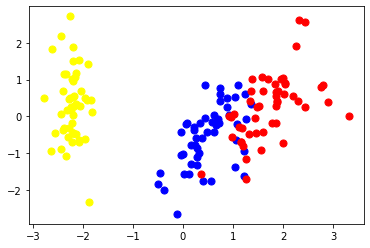

In [29]:
fig, ax = plt.subplots()

ax.scatter(finalDf.loc[finalDf['target'] == targets[0], 'PC1'],
           finalDf.loc[finalDf['target'] == targets[0], 'PC2'],
           c = colors[0],
           s = 50)

ax.scatter(finalDf.loc[finalDf['target'] == targets[1], 'PC1'],
           finalDf.loc[finalDf['target'] == targets[1], 'PC2'],
           c = colors[1],
           s = 50)

ax.scatter(finalDf.loc[finalDf['target'] == targets[2], 'PC1'],
           finalDf.loc[finalDf['target'] == targets[2], 'PC2'],
           c = colors[2],
           s = 50)

### Difficult but simple way

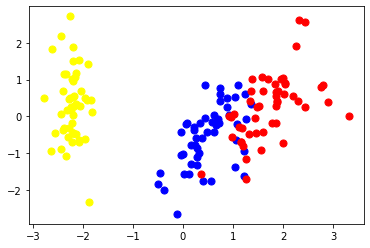

In [35]:
fig, ax = plt.subplots()

for i in range(0, len(targets)):
    targetIndex = finalDf['target'] == targets[i]
    ax.scatter(finalDf.loc[targetIndex, 'PC1'],
            finalDf.loc[targetIndex, 'PC2'],
            c = colors[i],
            s = 50)

## Explained Variance Ratio

**Note:** The explained variance tells us how much information (variance) can be attributed to each of the principal components

In [31]:
var_ratio = pca.explained_variance_ratio_

In [32]:
print('PC1 = ', var_ratio[0] * 100, '%')
print('PC2 = ', var_ratio[1] * 100, '%')
print('PC1 + PC2 = ', var_ratio.sum() * 100, '%')

PC1 =  72.77045209380132 %
PC2 =  23.03052326768065 %
PC1 + PC2 =  95.80097536148196 %
